# INTRODUCTION

Heart disease is a type of disease that affects the heart or blood vessels. The risk of certain heart diseases may be increased by smoking, high blood pressure, high cholesterol, unhealthy diet, lack of exercise, and obesity. Heart disease describes a range of conditions that affect the heart. These diseases include:

 ##### a)Blood vessel disease, such as coronary artery disease
 ##### b)Irregular heartbeats (arrhythmias)
 ##### c)Heart problems you're born with (congenital heart defects)
 ##### d)Disease of the heart muscle
 ##### e)Heart valve disease

## Details on the data set
### Title: Heart Disease Prediction
Relevant information: This is a data set used to predict heart disease. Patients were classified as having or not having heart disease based on cardiac catheterization, the gold standard. If they had more than 50% narrowing of a coronary artery they were labeled as having heart disease.

In this cohort, there are 270 patients and there are 13 independent predictive variables or column attributes. 

## Sources:
 a) This data set came from the University of California Irvine data repository and is used to predict heart disease
 
 b) https://data.world/informatics-edu/heart-disease-prediction/workspace/file?filename=+Heart_Disease_Prediction.csv

## Description of columns
* __age__: (In years)
* __sex__: (1 = male; 0 = female)
* __chest_pain_type__: Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
* __bp__-: resting blood pressure (in mm Hg on admission to the hospital)
* __cholestrol__: serum cholestoral in mg/dl
* __fbs_over_120__: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* __ekg_results__: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy
* __max_hr__: maximum heart rate achieved
* __exercise_angina__: exercise induced angina (1 = yes; 0 = no)
* __st_depression__: ST depression induced by exercise relative to rest
* __slope_of_st__: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
* __number_of_vessels_fluro__: number of major vessels (0-3) colored by flourosopy
* __thallium__: 3 = normal; 6 = fixed defect; 7 = reversable defect
* __heart_disease__: Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing


## GOAL OF THE PROJECT/ PROBLEM STATEMENT
To develop a model that can be used to predict whether an individual is at risk of having heart disease or not.

## 1. Importing necessary libraries for the project

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## 2. Load the dataset

In [6]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [7]:
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

## 3. Exploratory Data Analysis

In [8]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [9]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [15]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [16]:
df.shape

(270, 14)

In [18]:
df.value_counts()

Age  Sex  Chest pain type  BP   Cholesterol  FBS over 120  EKG results  Max HR  Exercise angina  ST depression  Slope of ST  Number of vessels fluro  Thallium  Heart Disease
29   1    2                130  204          0             2            202     0                0.0            1            0                        3         Absence          1
59   1    4                170  326          0             2            140     1                3.4            3            0                        7         Presence         1
58   1    4                128  259          0             2            130     1                3.0            2            2                        7         Presence         1
                           146  218          0             0            105     0                2.0            2            1                        7         Presence         1
                           150  270          0             2            111     1                0.8          

In [19]:
# checking null values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [20]:
df.isnull().any()

Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                False
Max HR                     False
Exercise angina            False
ST depression              False
Slope of ST                False
Number of vessels fluro    False
Thallium                   False
Heart Disease              False
dtype: bool

### Visualization

<Axes: >

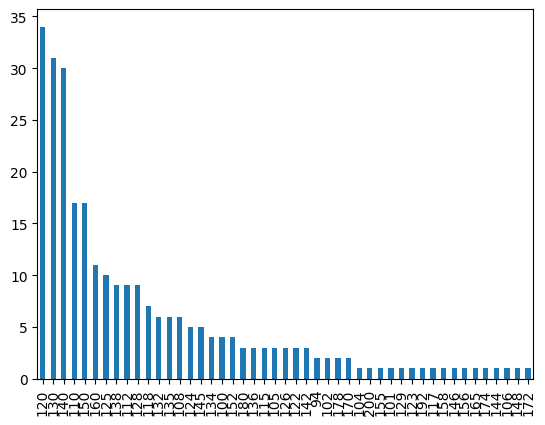

In [27]:
df['BP'].value_counts().plot(kind='bar')